In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
!pip install pytesseract


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install scikit-image

   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.5 MB 1.9 MB/s eta 0:00:13
   ---------------------------------------- 0.1/24.5 MB 1.5 MB/s eta 0:00:17
   ---------------------------------------- 0.1/24.5 MB 1.5 MB/s eta 0:00:17
   ---------------------------------------- 0.1/24.5 MB 1.5 MB/s eta 0:00:17
   ---------------------------------------- 0.1/24.5 MB 1.5 MB/s eta 0:00:17
   ---------------------------------------- 0.1/24.5 MB 1.5 MB/s eta 0:00:17
   ---------------------------------------- 0.1/24.5 MB 1.5 MB/s eta 0:00:17
   ---------------------------------------- 0.1/24.5 MB 1.5 MB/s eta 0:00:17
   ---------------------------------------- 0.1/24.5 MB 1.5 MB/s eta 0:00:17
   ---------------------------------------- 0.1/24.5 MB 1.5 MB/s eta 0:00:17
   -----------------


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import skimage.io as io
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True
from PIL import Image
import re
import pytesseract
import pickle

## Classification

In [16]:
dataframe = pd.read_csv("labels.csv")

In [17]:
dataframe=dataframe.drop(dataframe.columns[0], axis=1)
dataframe["overall_sentiment"]=dataframe["overall_sentiment"].map({"neutral":0, "positive":1, "very_positive":2, "negative":3, "very_negative":4})  

In [18]:
dataframe=dataframe.sort_values(by=["overall_sentiment"], ascending=True)
dataframe=dataframe.reset_index(drop=True)
dataframe

,image_name,text_ocr,text_corrected,overall_sentiment
0,image_1311.jpg,THAT MOMENT YOU REALIZE USE THIS WAS A REALLY ...,THAT MOMENT YOU REALIZE USE THIS WAS A REALLY ...,0
1,image_1664.jpg,THE FACE YOU MAKE WHEN YOU MEET HER EX PUUSLIW...,THE FACE YOU MAKE WHEN YOU MEET HER EX PUUSLIW...,0
2,image_5509.jpg,Me in 2011 small issues offhandedly dismissed ...,Me in 2011 small issues offhandedly dismissed ...,0
3,image_1666.jpg,WEALTHY KNIGHT THAT COULD HAVE ANY WOMAN? FUCK...,WEALTHY KNIGHT THAT COULD HAVE ANY WOMAN? FUCK...,0
4,image_1669.jpg,WHAT YOU THINK YOU LOOK LIKE FLIRTING WITH YOU...,WHAT YOU THINK YOU LOOK LIKE FLIRTING WITH YOU...,0
...,...,...,...,...
6987,image_4076.jpg,YOU GET TO EAT FOOD EVERYDAY?! quickmeme.com,YOU GET TO EAT FOOD EVERYDAY?! quickmeme.com,4
6988,image_5871.jpg,"DATHI WHAT IS WITH ""HER NECK ANYWAY? imgflip.com","DATHI WHAT IS WITH ""HER NECK ANYWAY? imgflip.com",4
6989,image_3622.jpg,DONT TREAT WOMEN LIKE OBJECTS OBJECTS ARE USEF...,DONT TREAT WOMEN LIKE OBJECTS OBJECTS ARE USEF...,4
6990,image_5451.jpeg,THIS IS THE I'M WHITE,"THIS IS THE I'M WHITE BUT MY KIDS WONT BE""HAIRDO",4


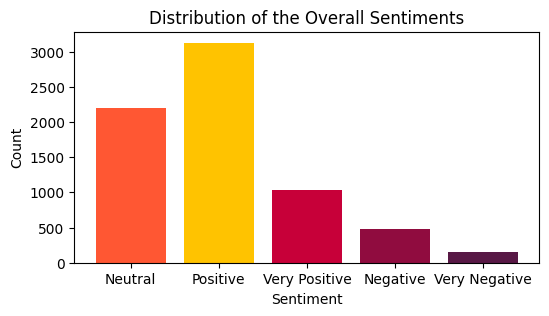

In [19]:
dataframe["overall_sentiment"].value_counts()   #   Finding the count of each sentiment in the pandas.DataFrame.
plt.figure(figsize=(6, 3))
plt.bar(dataframe["overall_sentiment"].value_counts().index, dataframe["overall_sentiment"].value_counts().values, color=["#FFC300", "#FF5733", "#C70039", "#900C3F", "#581845"])
plt.xticks(dataframe["overall_sentiment"].value_counts().index, ["Positive", "Neutral", "Very Positive", "Negative", "Very Negative"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of the Overall Sentiments")
plt.show()

In [20]:
#   Separating the majority and minority classes.

dataframe_majority=dataframe[dataframe["overall_sentiment"]==1]
dataframe_minority=dataframe[dataframe["overall_sentiment"]!=1]

dataframe_minority_upsampled=resample(dataframe_minority, replace=True, n_samples=len(dataframe_majority), random_state=42) #   Resampling the minority class with replacement.
dataframe_upsampled=pd.concat([dataframe_majority, dataframe_minority_upsampled])   #   Concatenating the majority and minority class pandas.DataFrames.
dataframe_upsampled=dataframe_upsampled.sort_values(by=["overall_sentiment"], ascending=True)
dataframe_upsampled=dataframe_upsampled.reset_index(drop=True)  #   Resetting the index of the pandas.DataFrame.
dataframe_upsampled["overall_sentiment"].value_counts() #   Finding the frequencies of each sentiment in the pandas.DataFrame.

overall_sentiment
1    3127
0    1784
2     837
3     398
4     108
Name: count, dtype: int64

In [21]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'